# Stationarity

#### Time-series data is said to be stationary if it doesn’t change with time or if they don’t have a temporal structure. So, it is highly necessary to check if the data is stationary. In time series forecasting, we cannot derive valuable insights from data if it is stationary.

#### Types of stationarity:

##### Trend Stationary –  A time series that does not show a trend.
##### Seasonal Stationary – A time series that does not show seasonal changes.
##### Strictly Stationary – The joint distribution of observations is invariant to time shift

## Step 1: Plotting the time series data

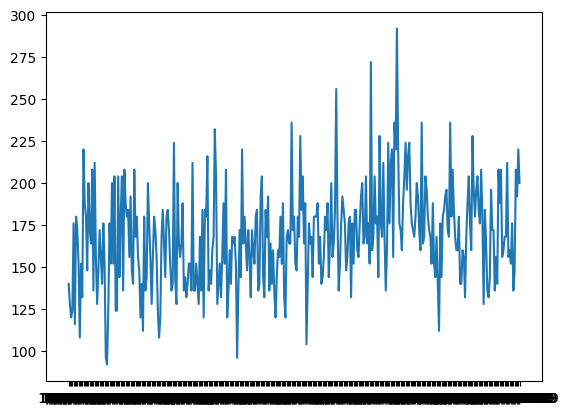

In [11]:
# importing library
import pandas as pd
import numpy as np

# import python matplotlib library for plotting
import matplotlib.pyplot as plt

# read the dataset using pandas read_csv() 
# function
data = pd.read_csv("daily-total-female-births-IN.csv",
                    header=0, index_col=0)

# use simple line plot to see the distribution 
# of the data
plt.plot(data)

## Step 2: Evaluating the descriptive statistics

By splitting the data into two or more partitions and calculating the mean and variance for each group. If these first-order moments are consistent among these partitions, then we can assume that the data is stationary.

         #Passengers
Month               
1949-01          112
1949-02          118
1949-03          132
1949-04          129
1949-05          121
1949-06          135


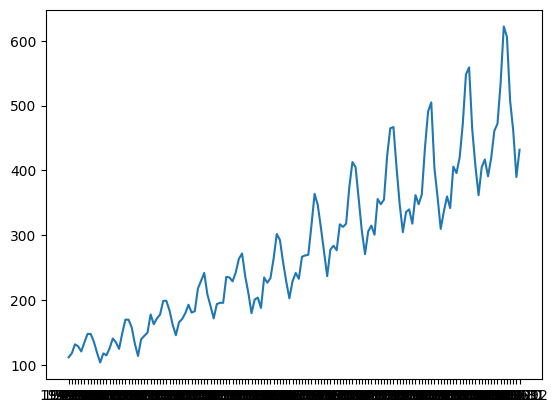

In [13]:
# read the dataset using pandas read_csv() 
# function
data = pd.read_csv("AirPassengers.csv",
                header=0, index_col=0)

# print the first 6 rows of data
print(data.head(6))

# use simple line plot to understand the 
# data distribution
plt.plot(data)

Now, let’s partition this data into different groups and calculate the mean and variance of different groups and check for consistency.

In [14]:
# extracting only the air passengers count from the dataset using values function
values = data.values

# getting the count to split the dataset into 3
parts = int(len(values)/3)

# splitting the data into three parts
part_1, part_2, part_3 = values[0:parts], values[parts:(
    parts*2)], values[(parts*2):(parts*3)]

# calculating the mean of the separated three 
# parts of data individually.
mean_1, mean_2, mean_3 = part_1.mean(), part_2.mean(), part_3.mean()

# calculating the variance of the separated 
# three parts of data individually.
var_1, var_2, var_3 = part_1.var(), part_2.var(), part_3.var()

# printing the mean of three groups
print('mean1=%f, mean2=%f, mean2=%f' % (mean_1, mean_2, mean_3))

# printing the variance of three groups
print('variance1=%f, variance2=%f, variance2=%f' % (var_1, var_2, var_3))

mean1=158.375000, mean2=269.041667, mean2=413.479167
variance1=1071.859375, variance2=3041.289931, variance2=6033.624566


* The output clearly implies that the mean and variance of the three groups are considerably different from each other describing the data is non-stationary. 
* For example if the means where mean_1 = 150, mean_2 = 160, mean_3 = 155 and variance_1 = 33, variance_2 = 35, variance_3 = 37, then we can conclude that the data is stationary.

Try the same example by takeing the log of the passengers count using NumPy’s log() function.

[[4.71849887]
 [4.77068462]
 [4.88280192]
 [4.8598124 ]
 [4.79579055]
 [4.90527478]
 [4.99721227]
 [4.99721227]
 [4.91265489]
 [4.77912349]
 [4.6443909 ]
 [4.77068462]
 [4.74493213]
 [4.83628191]
 [4.94875989]]


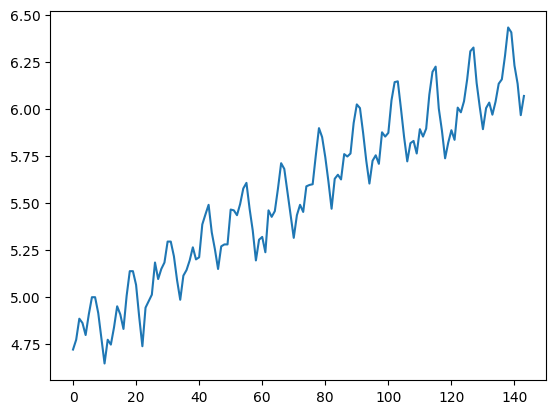

In [15]:
# extracting only the air passengers count 
# from the dataset using values function
values = np.log(data.values)

# printing the first 15 passenger count values
print(values[0:15])

# using simple line plot to understand the 
# data distribution
plt.plot(values)

In [16]:
# getting the count to split the dataset
# into 3 parts
parts = int(len(values)/3)

# splitting the data into three parts.
part_1, part_2, part_3 = values[0:parts], values[parts:(parts*2)], values[(parts*2):(parts*3)]

# calculating the mean of the separated three 
# parts of data individually.
mean_1, mean_2, mean_3 = part_1.mean(), part_2.mean(), part_3.mean()

# calculating the variance of the separated three 
# parts of data individually.
var_1, var_2, var_3 = part_1.var(), part_2.var(), part_3.var()

# printing the mean of three groups
print('mean1=%f, mean2=%f, mean2=%f' % (mean_1, mean_2, mean_3))

# printing the variance of three groups
print('variance1=%f, variance2=%f, variance2=%f' % (var_1, var_2, var_3))

mean1=5.043911, mean2=5.574733, mean2=6.007884
variance1=0.042007, variance2=0.039668, variance2=0.032704


## Step 3: Augmented Dickey-Fuller test

This is a statistical test that is dedicatedly built to test whether univariate time series data is stationary or not. This test is based on a hypothesis and can tell us the degree of probability to which it can be accepted.

* Ho (Null Hypothesis): The time series data is non-stationary
* H1 (alternate Hypothesis): The time series data is stationary

The test results are interpreted with a p-value if p > 0.05 fails to reject the null hypothesis, else if p <= 0.05 reject the null hypothesis.

In [17]:
# import the adfuller function from statsmodel 
# package to perform ADF test
from statsmodels.tsa.stattools import adfuller

# read the dataset using pandas read_csv() function
data = pd.read_csv("AirPassengers.csv", header=0, index_col=0)

# extracting only the passengers count using values function
values = data.values

# passing the extracted passengers count to adfuller function.
# result of adfuller function is stored in a res variable
res = adfuller(values)

# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])

# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: 0.815369
p-value: 0.991880
critical values at different levels:
	1%: -3.482
	5%: -2.884
	10%: -2.579


As per our hypothesis, the ADF statistic is much greater than the critical values at different levels, and also the p-value is also greater than 0.05 which signifies, we can fail to reject the null hypothesis at 90%, 95%, and 99% confidence, meaning the time series data is strongly non-stationary. 

Try running the ADF test to the log normed values.

In [19]:
# extracting only the passengers count using 
# values function and applying log transform on it.
values = np.log(data.values)

# passing the extracted passengers count to adfuller function.
# result of adfuller function is stored in a res variable
res = adfuller(values)

# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])

# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -1.717017
p-value: 0.422367
critical values at different levels:
	1%: -3.482
	5%: -2.884
	10%: -2.579


The ADF test shows that the ADF statistic is much greater than the critical values at different levels, and also the p-value is much greater than 0.05 which signifies, we can fail to reject the null hypothesis at 90%, 95%, and 99% confidence, meaning the time series data is strongly non-stationary. 